# Taxis Data: Study, Clean and Transform
This notebook will study, clean and transform the taxis datasets downloaded from:

**2017:** https://data.cityofnewyork.us/Transportation/2017-Yellow-Taxi-Trip-Data/biws-g3hs<br>
**2018:** https://data.cityofnewyork.us/Transportation/2018-Yellow-Taxi-Trip-Data/t29m-gskq<br>
**2018:** https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp<br>

### 0. [Premilinary Works](#Premilinary-Works)
- [How big are the files](#How-big-are-the-files)<br>
- [Count lines](#Count-lines)<br>
- [Inspect first lines](#Inspect-first-lines)


### 1. [Prepare a sample file](#Prepare-sample-file)

### 2. [Study the data](#Study-the-data)
- ```.shape```:        check nº of rows and columns.
- ```list(b.columns)```: check white spaces in column names.
- ```.sample()```: check random sample. Get the data dictionary and study all fields.
- ```.info()```: check data types and spot nulls.
- ```.describe()```: check descriptive statistics.<br>
- ``.isnull()``: what to do with NaNs.<br>
- [Study ```trip_distance``` field](#Study-trip_distance-field)<br>
- [Study negative ```fare_amount``` values](#Study-negative-fare_amount-values)<br>
- [Make sure that all data is from the right year](#Make-sure-that-all-data-is-from-the-right-year)
- [Compare Manhattan pickups against other boroughs](#Compare-Manhattan-pickups-against-other-boroughs)

### 3. [Select columns of interest](#Select-columns-of-interest)

### 4. [Data Cleaning](#Data-Cleaning)
- [Create Data Frame with Manhattan zones](#Create-Data-Frame-with-Manhattan-zones)
- [Clean dataset according to studies above](#Clean-dataset-according-to-studies-above)
- [Break down ``datetime`` into other useful features](#Break-down-datetime-into-other-useful-features)
- [Script Recap](#Script-Recap): the 3 steps above put together

### 5. [Adjust the code to work with Big Data](#Adjust-the-code-to-work-with-Big-Data)
#### 5.1 [Test Big Data approach on a sample](#Test-Big-Data-approach-on-a-sample)
- [Define functions](#Define-functions)
- [Test functions](#Test-functions)
- [Sanity check 1](#Sanity-check-1)

#### 5.2 [Run program with Big Data](#Run-program-with-Big-Data)
- [Sanity check 2](#Sanity-check-2): check some indicators to make sure that the resulting csv's are correct.

# Premilinary Works

### How big are the files

In [14]:
# naviate to the data folder
cd ../data

/home/angelrps/git/MasterDataScience_FinalProject/data


In [17]:
# list the files in data folder
!ls -Rl

.:
total 3709836
-rwxrwxrwx 1 angelrps angelrps 1048588401 Mar 25 13:15 2017_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps 1065918551 Jun 18 12:58 2018_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps  835929368 Apr  2 18:02 2019_Yellow_Taxi_Trip_Data.csv.bz2
-rw-rw-rw- 1 angelrps angelrps   30849190 Jul 29 10:10 Data_Cleaned_2017_To_Model.csv
-rw-rw-rw- 1 angelrps angelrps   13400119 Jun 23 09:34 Data_Cleaned_To_Model.csv
-rw-rw-rw- 1 angelrps angelrps   24414565 Jul  9 14:50 Data_Taxis_2017_Cleaned.csv
-rw-rw-rw- 1 angelrps angelrps   23640868 Jul 22 14:12 Data_Taxis_2017_Cleaned_Simplified.csv
-rw-rw-rw- 1 angelrps angelrps       2911 Jul  8 20:24 Data_Taxis_2017_Cleaned_TEST.csv
-rw-rw-rw- 1 angelrps angelrps   24349417 Jul  9 21:36 Data_Taxis_2018_Cleaned.csv
-rw-rw-rw- 1 angelrps angelrps   24168029 Jul 10 00:46 Data_Taxis_2019_Cleaned.csv
-rwxrwxrwx 1 angelrps angelrps     557877 Jul 29 10:01 Data_Weather_Cleaned.csv
-rwxrwxrwx 1 angelrps angelrps     

The CSVs dowloaded are quite big:
    - 2017_Yellow_Taxi_Trip_Data.csv is 10532305815 bytes (9,80 GB)
    - 2018_Yellow_Taxi_Trip_Data.csv is 10428263736 bytes (9,71 GB)
    - 2019_Yellow_Taxi_Trip_Data.csv is 8197837930 bytes (7,63 GB)
    
I have compressed them (bz2) to work with them (see cells below).<br>
I have also removed the CSVs from my computer and kept the bz2 files.

In [20]:
# Compress CSV to BZ2. I have commented this line because it takes a lot of time to run.

#!bzip2 2017_Yellow_Taxi_Trip_Data.csv 2018_Yellow_Taxi_Trip_Data.csv 2019_Yellow_Taxi_Trip_Data.csv

In [5]:
# check the new size of the bz2 files
!ls -Rl

.:
total 2897760
-rwxrwxrwx 1 angelrps angelrps 1048588401 Mar 25 13:15 2017_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps 1065918551 Jun 18 12:58 2018_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps  835929368 Apr  2 18:02 2019_Yellow_Taxi_Trip_Data.csv.bz2
-rwxrwxrwx 1 angelrps angelrps     564780 Jun 18 11:15 Data_Weather_Cleaned.csv
-rwxrwxrwx 1 angelrps angelrps     436485 Jun 16 10:51 LCD_documentation.pdf
-rwxrwxrwx 1 angelrps angelrps   13843633 Jun 16 09:40 NOAA_CentralPark_Weather.csv
-rwxrwxrwx 1 angelrps angelrps     196848 Apr  7 19:34 data_dictionary_trip_records_yellow.pdf
-rwxrwxrwx 1 angelrps angelrps    1489310 Apr  7 19:34 taxi_zone_map_manhattan.jpg
-rwxrwxrwx 1 angelrps angelrps     202694 Apr  4 12:46 trip_record_user_guide.pdf


In [19]:
# navigate back to the notebooks folder
cd ../notebooks

/home/angelrps/git/MasterDataScience_FinalProject/notebooks


### Count lines

In [5]:
# Count Number of Lines: IT TAKES TIME, JUST BE AWARE BEFORE YOU UNCOMMENT
# My computer needed 15 min to calculate the lines

# !bzcat -c ./2019_Yellow_Taxi_Trip_Data.csv.bz2 | wc -l
# !bzcat -c ./2018_Yellow_Taxi_Trip_Data.csv.bz2 | wc -l
# !bzcat -c ./2017_Yellow_Taxi_Trip_Data.csv.bz2 | wc -l

# RESULTS
# 2017_...113.496.875 lines
# 2018_...112.234.627 lines
# 2019_...84.399.020 lines

84399020
112234627
113496875


### Inspect first lines
- There is a header on the first line
- The separator is ```','```
- Column names and number are as expected, according to the data dictionary **data_dictionary_trip_records_yellow.pdf**

In [11]:
!bzcat ./2019_Yellow_Taxi_Trip_Data.csv.bz2 | head -n 5

VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
1,04/29/2019 11:31:03 AM,04/29/2019 11:31:03 AM,1,0,1,N,231,264,2,2.5,2.5,0.5,0,0,0.3,5.8,2.5
2,04/29/2019 10:52:08 AM,04/29/2019 11:06:18 AM,1,1.01,1,N,186,230,1,10,0,0.5,2.66,0,0.3,15.96,2.5
2,04/29/2019 11:28:40 AM,04/29/2019 11:33:01 AM,1,0.82,1,N,238,151,1,5,0,0.5,1.66,0,0.3,9.96,2.5
1,04/29/2019 11:28:06 AM,04/29/2019 12:07:32 PM,1,12.1,1,N,138,88,1,38.5,2.5,0.5,10.4,0,0.3,52.2,2.5

bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = ./2019_Yellow_Taxi_Trip_Data.csv.bz2, output file = (stdout)


# Prepare sample file
In order to explore, clean and transform the data I will take a 10.000 lines sample.

In [1]:
import pandas as pd
import random
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import matplotlib.pyplot as plt

In [2]:
# 1. Prepare sample file with 10.000 rows
#    Parse 'tpep_pickup_datetime' column to datetime object type
year = 2017
dfsample = pd.read_csv('../data/'+str(year)+'_Yellow_Taxi_Trip_Data.csv.bz2', sep=',',
                       nrows=9999)

dfsample = dfsample.rename(columns={'PULocationID':'LocationID'})

# Study the data

- ```b.shape```:        check nº of rows and columns.
- ```list(b.columns)```: check white spaces in column names.
- ```b.sample()```: check random sample. Get the data dictionary and study all fields.
- ```b.info()```: check data types and spot nulls.
- ```b.describe()```: check descriptive statistics.
- Make sure that all data is from the right year.
- Compare Manhattan pickups against other boroughs.

In [3]:
dfsample.shape

(9999, 17)

Column names have no white spaces.

In [4]:
list(dfsample.columns)

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'LocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

Values of this random sample make sense, according to units and descriptions from the data dictionary

In [5]:
dfsample.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,LocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
6217,1,06/14/2017 05:26:34 PM,06/14/2017 05:26:34 PM,1,0.00,1,N,151,264,2,10.0,1.0,0.5,0.00,0.0,0.3,11.80
3153,1,06/14/2017 05:15:58 PM,06/14/2017 05:32:37 PM,1,1.40,1,N,161,142,1,11.5,1.0,0.5,1.33,0.0,0.3,14.63
734,2,06/14/2017 05:07:09 PM,06/14/2017 05:40:16 PM,1,2.56,1,N,234,231,1,20.0,1.0,0.5,4.36,0.0,0.3,26.16
5359,1,06/14/2017 05:23:39 PM,06/14/2017 05:34:48 PM,1,0.40,1,N,186,100,2,8.0,1.0,0.5,0.00,0.0,0.3,9.80
5455,1,06/14/2017 05:23:58 PM,06/14/2017 06:34:45 PM,2,10.10,1,N,138,231,1,46.0,1.0,0.5,7.00,0.0,0.3,54.80


Using ```.info()``` I don´t see any null values.<br>
Data types: all seem correct apart from ```tpep_pickup_datetime```and ```tpep_dropoff_datetime``` that should be **datetime**.

In [6]:
dfsample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 17 columns):
VendorID                 9999 non-null int64
tpep_pickup_datetime     9999 non-null object
tpep_dropoff_datetime    9999 non-null object
passenger_count          9999 non-null int64
trip_distance            9999 non-null float64
RatecodeID               9999 non-null int64
store_and_fwd_flag       9999 non-null object
LocationID               9999 non-null int64
DOLocationID             9999 non-null int64
payment_type             9999 non-null int64
fare_amount              9999 non-null float64
extra                    9999 non-null float64
mta_tax                  9999 non-null float64
tip_amount               9999 non-null float64
tolls_amount             9999 non-null float64
improvement_surcharge    9999 non-null float64
total_amount             9999 non-null float64
dtypes: float64(8), int64(6), object(3)
memory usage: 1.3+ MB


Using ```.describe()``` I see:
- There are trips with 0 ```trip_distance```: I will remove all trips with ```trip_distance``` < 0.06 (100 meters) because I consider them either measurement errors or non representative data.
- There are trips with negative ```fare_amount```

In [7]:
dfsample.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,LocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,1.553655,1.596160,2.740085,1.050305,167.686269,166.439344,1.334033,14.109142,1.089339,0.497500,2.079593,0.369533,0.299520,18.451122
std,0.497138,1.217713,3.674077,1.014581,65.660696,69.065949,0.491204,12.289052,0.574930,0.038653,2.762461,1.591557,0.015869,15.458380
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-25.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-26.300000
25%,1.000000,1.000000,0.900000,1.000000,137.000000,129.000000,1.000000,7.000000,1.000000,0.500000,0.000000,0.000000,0.300000,9.800000
50%,2.000000,1.000000,1.500000,1.000000,162.000000,163.000000,1.000000,10.500000,1.000000,0.500000,1.550000,0.000000,0.300000,13.560000
75%,2.000000,2.000000,2.640000,1.000000,234.000000,236.000000,2.000000,16.000000,1.000000,0.500000,2.760000,0.000000,0.300000,20.000000
max,2.000000,6.000000,53.000000,99.000000,265.000000,265.000000,4.000000,316.000000,4.500000,0.500000,51.840000,42.700000,0.300000,316.300000


### What to do with NaNs
There are not any NaNs in this sample. I cannot analyse the whole dataset but I will asume that there are either none, or very few NaNs. For the potential few NaNs I will remove those lines.

In [9]:
dfsample.isnull().values.any()

False

### Study ```trip_distance``` field

In the 2019 dataset sample there are 67 rows with 0 distance and few others with distances under 100 meters (0.06 miles).

67 is just a 6% of the lines so **I will remove them**, as I consider these values either measurement errors or non representative data.

In [10]:
dfsample['ZeroDistCount'] = 1
dist = dfsample.groupby('trip_distance', as_index = False)['ZeroDistCount'].sum()
dist.head(10)

,trip_distance,ZeroDistCount
0,0.00,67
1,0.01,3
2,0.02,3
3,0.03,2
4,0.05,2
5,0.06,2
6,0.07,2
7,0.08,5
8,0.09,1
9,0.10,15


### Study negative ```fare_amount``` values

In the 2019 dataset sample there are only 9 rows with ```fare_amount```values under $1.

This is just a 0.9% of the data so **I will remove them**, as I consider these values either measurement errors or non representative data.

In [11]:
dfsample['FareCount'] = 1
fare = dfsample[dfsample['fare_amount']<1].groupby('fare_amount', as_index = False)['FareCount'].sum()
fare.head(25)

,fare_amount,FareCount
0,-25.00,1
1,-9.50,1
2,-6.00,1
3,-3.50,1
4,-2.50,2
5,0.00,2
6,0.01,1


### Make sure that all data is from the right year
For this small sample (10000 rows) not only all the data is from the same year but also from the same day.<br>
I will add a year filter anyway as a prevention measure.

In [12]:
dfsample['tpep_pickup_datetime'] = pd.to_datetime(dfsample['tpep_pickup_datetime'])
d = dfsample.sort_values('tpep_pickup_datetime')

display(d.head(2))
display(d.tail(2))

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,LocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ZeroDistCount,FareCount
0,2,2017-06-14 17:04:21,06/14/2017 05:08:02 PM,1,0.56,1,N,237,162,1,4.5,1.0,0.5,1.58,0.00,0.3,7.88,1,1
1,2,2017-06-14 17:04:22,06/14/2017 05:56:45 PM,5,10.75,1,N,138,230,1,38.5,1.0,0.5,9.21,5.76,0.3,55.27,1,1


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,LocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,ZeroDistCount,FareCount
9993,1,2017-06-14 17:38:53,06/14/2017 05:49:22 PM,1,1.5,1,N,90,125,1,9.0,1.0,0.5,3.20,0.0,0.3,14.00,1,1
9998,2,2017-06-14 17:38:53,06/14/2017 05:54:24 PM,1,1.3,1,N,107,234,1,11.0,1.0,0.5,2.56,0.0,0.3,15.36,1,1


# Compare Manhattan pickups against other boroughs
The majority of the pickups are inside Manhattan. This is an expected result as Manhattan concentrates most of the New York activity.

In [13]:
# CREATE DATAFRAME WITH MANHATTAN BOROUGHS AND LOCATIONIDs
dfzones = pd.read_csv('../data/NY_taxi_zones.csv', sep=',',
                      usecols=['LocationID', 'borough'])
dfzones.head()

,LocationID,borough
0,1,EWR
1,2,Queens
2,3,Bronx
3,4,Manhattan
4,5,Staten Island


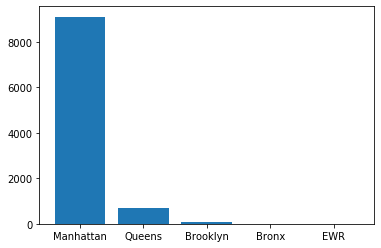

In [14]:
t = dfsample.merge(dfzones, on='LocationID', how = 'left')
t['boroughCount'] = 1
t2 = t[['borough', 'boroughCount']]
t3 = t2.groupby('borough').sum().reset_index().sort_values('boroughCount', ascending=False)

plt.bar(t3['borough'],t3['boroughCount'])
plt.show()

# Select columns of interest
From the previous study these are the columns I need to clean up the data:

``pickup_datetime``: The date and time when the meter was engage  
``trip_distance``: The elapsed trip distance in miles reported by the taximeter  
``PULocationID``: TLC Taxi Zone in which the taximeter was engaged  
``fare_amount``: The time-and-distance fare calculated by the meter 

# Data Cleaning

### Create Data Frame with Manhattan zones

In [15]:
# 1. Import Location and Borough columns from NY TAXI ZONES dataset
dfzones = pd.read_csv('../data/NY_taxi_zones.csv', sep=',',
                      usecols=['LocationID', 'borough'])

# 2. Filter Manhattan zones
    # Drop Borough column
    # Sort values
    # Drop duplicates
                #.drop(['borough'], axis=1)\
dfManZon = dfzones[dfzones['borough']=='Manhattan']\
            .sort_values(by='LocationID')\
            .drop_duplicates('LocationID').reset_index(drop=True)

dfManZon_array = dfManZon.iloc[:,0].values
print(dfManZon_array.size)
dfManZon_array

# There are 67 zones in Manhattan

67


array([  4,  12,  13,  24,  41,  42,  43,  45,  48,  50,  68,  74,  75,
        79,  87,  88,  90, 100, 103, 107, 113, 114, 116, 120, 125, 127,
       128, 137, 140, 141, 142, 143, 144, 148, 151, 152, 153, 158, 161,
       162, 163, 164, 166, 170, 186, 194, 202, 209, 211, 224, 229, 230,
       231, 232, 233, 234, 236, 237, 238, 239, 243, 244, 246, 249, 261,
       262, 263])

### Clean dataset according to studies above

In [16]:
# RECAP

# LOAD LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime as dt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


# 1. Prepare sample file with 10.000 rows
#    Parse 'tpep_pickup_datetime' column to datetime object type
#    Import just needed columns to lighten the process
year = 2019
dfsample = pd.read_csv('../data/'+str(year)+'_Yellow_Taxi_Trip_Data.csv.bz2', sep=',',
                       usecols=['tpep_pickup_datetime','PULocationID','trip_distance','fare_amount'],
                       nrows=9999,
                       parse_dates={'datetime':['tpep_pickup_datetime']})

dfsample = dfsample.rename(columns={'PULocationID':'LocationID'})

# 2. Drop NaNs
dfsample.dropna(inplace=True)

# 3. Remove all rows with 'trip_distance' < 0.06 (100m) because I consider them measurement errors or non representative values
DistIndex_to_drop = dfsample[dfsample['trip_distance'] < 0.06].index
dfsample.drop(DistIndex_to_drop, inplace=True)
# dfsample[dfsample['trip_distance']<0.06].index # this should be none

# 4. Remove rows with 'fare_amount' negative or <1$ because I consider them measurement errors or non relevant.
FareIndex_to_drop = dfsample[dfsample['fare_amount']<1].index
dfsample.drop(FareIndex_to_drop, inplace=True)
#dfsample[dfsample['fare_amount']<1] # this should be none

# 5. Filter just Manhattan pickups
dfsample = dfsample.loc[dfsample['LocationID'].isin(dfManZon_array)]
#dfsample['LocationID'].unique().shape

# 6. Select columns of interest.
#    'datetime'
#    'LocationID'
dfsample = dfsample[['datetime','LocationID']].copy()
#dfsample.head()

# 7. Drop unwanted years
dfsample.drop(dfsample[dfsample['datetime'] < pd.Timestamp(dt(year,1,1))].index, inplace=True)
dfsample.drop(dfsample[dfsample['datetime'] >= pd.Timestamp(dt(year+1,1,1))].index, inplace=True)

# 8. Groupby HOUR and LocationID
    # set time period index
dfsample.set_index('datetime', inplace=True) # Set timestamp as index
dfsample = dfsample.to_period("H") # convert DATE to 1 hour PERIODS
    # Sort by datetime and by Location
dfsample.sort_values(['datetime', 'LocationID'], inplace=True)
    # Create new column to count Number of Pickups per LocationID
dfsample['pickups'] =1
    # Groupby Datetime and Location to get Pickups sum()
dfsample=dfsample.groupby(['datetime', 'LocationID'])['pickups'].sum().reset_index()
    # Convert Period[H] to datetime64
dfsample['datetime'] = dfsample['datetime'].dt.to_timestamp()
dfsample.head()

,datetime,LocationID,pickups
0,2019-04-29 05:00:00,90,1
1,2019-04-29 06:00:00,68,1
2,2019-04-29 06:00:00,88,1
3,2019-04-29 06:00:00,107,1
4,2019-04-29 06:00:00,113,1


### Break down ``datetime`` into other useful features

``year``, ``month``, ``day``, ``hour``, ``week``, ``dayofweek``, ``isweekend``, ``isholiday``

In [17]:
# 8. Create new variables from datetime
dfsample['year'] = dfsample['datetime'].dt.year
dfsample['month'] = dfsample['datetime'].dt.month
dfsample['day'] = dfsample['datetime'].dt.day
dfsample['hour'] = dfsample['datetime'].dt.hour
dfsample['week'] = dfsample['datetime'].dt.week
dfsample['dayofweek'] = dfsample['datetime'].dt.dayofweek
    # 8.1 create variable 'isweekend'
mask = (dfsample['dayofweek'] == 5) | (dfsample['dayofweek'] == 6)
dfsample['isweekend'] = np.where(mask, 1, 0)
#dfsample.sample(50)

    # 8.2 Create date time index calendar
drange = pd.date_range(start=str(year)+'-01-01', end=str(year)+'-12-31')
cal = calendar()
holidays = cal.holidays(start=drange.min(), end=drange.max())
    # 8.3 create new columns 'date' and 'isholiday'
dfsample['date'] = pd.to_datetime(dfsample['datetime'].dt.date)
dfsample['isholiday'] = dfsample['datetime'].isin(holidays).astype(int)
    # 8.4 drop column 'date'
dfsample.drop(['date'], axis=1, inplace=True)
dfsample.head()

,datetime,LocationID,pickups,year,month,day,hour,week,dayofweek,isweekend,isholiday
0,2019-04-29 05:00:00,90,1,2019,4,29,5,18,0,0,0
1,2019-04-29 06:00:00,68,1,2019,4,29,6,18,0,0,0
2,2019-04-29 06:00:00,88,1,2019,4,29,6,18,0,0,0
3,2019-04-29 06:00:00,107,1,2019,4,29,6,18,0,0,0
4,2019-04-29 06:00:00,113,1,2019,4,29,6,18,0,0,0


### Script Recap
The 3 steps above put together

In [7]:
# LOAD LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime as dt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


########## CREATE DATA FRAME WITH MANHATTAN ZONES ##########

# 1. Import Location and Borough columns from NY TAXI ZONES dataset
dfzones = pd.read_csv('../data/NY_taxi_zones.csv', sep=',',
                      usecols=['LocationID', 'borough'])

# 2. Filter Manhattan zones
    # Drop Borough column
    # Sort values
    # Drop duplicates
                #.drop(['borough'], axis=1)\
dfManZon = dfzones[dfzones['borough']=='Manhattan']\
            .sort_values(by='LocationID')\
            .drop_duplicates('LocationID').reset_index(drop=True)

dfManZon_array = dfManZon.iloc[:,0].values

########## CLEAN DATA ##########

# 1. Prepare sample file with 10.000 rows
#    Parse 'tpep_pickup_datetime' column to datetime object type
#    Import just needed columns to lighten the process
year = 2019
dfsample = pd.read_csv('../data/'+str(year)+'_Yellow_Taxi_Trip_Data.csv.bz2', sep=',',
                       usecols=['tpep_pickup_datetime','PULocationID','trip_distance','fare_amount'],
                       nrows=9999,
                       parse_dates={'datetime':['tpep_pickup_datetime']})

dfsample = dfsample.rename(columns={'PULocationID':'LocationID'})

# 2. Drop NaNs
dfsample.dropna(inplace=True)

# 3. Remove all rows with 'trip_distance' < 0.06 (100m) because I consider them measurement errors or non representative values
DistIndex_to_drop = dfsample[dfsample['trip_distance'] < 0.06].index
dfsample.drop(DistIndex_to_drop, inplace=True)
# dfsample[dfsample['trip_distance']<0.06].index # this should be none

# 4. Remove rows with 'fare_amount' negative or <1$ because I consider them measurement errors or non relevant.
FareIndex_to_drop = dfsample[dfsample['fare_amount']<1].index
dfsample.drop(FareIndex_to_drop, inplace=True)
#dfsample[dfsample['fare_amount']<1] # this should be none

# 5. Filter just Manhattan pickups
dfsample = dfsample.loc[dfsample['LocationID'].isin(dfManZon_array)]
#dfsample['LocationID'].unique().shape

# 6. Select columns of interest.
#    'datetime'
#    'LocationID'
dfsample = dfsample[['datetime','LocationID']].copy()
#dfsample.head()

# 7. Drop unwanted years
dfsample.drop(dfsample[dfsample['datetime'] < pd.Timestamp(dt(year,1,1))].index, inplace=True)
dfsample.drop(dfsample[dfsample['datetime'] >= pd.Timestamp(dt(year+1,1,1))].index, inplace=True)

# 8. Groupby HOUR and LocationID
    # set time period index
dfsample.set_index('datetime', inplace=True) # Set timestamp as index
dfsample = dfsample.to_period("H") # convert DATE to 1 hour PERIODS
    # Sort by datetime and by Location
dfsample.sort_values(['datetime', 'LocationID'], inplace=True)
    # Create new column to count Number of Pickups per LocationID
dfsample['pickups'] =1
    # Groupby Datetime and Location to get Pickups sum()
dfsample=dfsample.groupby(['datetime', 'LocationID'])['pickups'].sum().reset_index()
    # Convert Period[H] to datetime64
dfsample['datetime'] = dfsample['datetime'].dt.to_timestamp()


########## BREAKDOWN DATETIME INTO OTHER USEFUL FEATURES ##########

# 9. Create new variables from datetime
dfsample['year'] = dfsample['datetime'].dt.year
dfsample['month'] = dfsample['datetime'].dt.month
dfsample['day'] = dfsample['datetime'].dt.day
dfsample['hour'] = dfsample['datetime'].dt.hour
dfsample['week'] = dfsample['datetime'].dt.week
dfsample['dayofweek'] = dfsample['datetime'].dt.dayofweek
    # 9.1 create variable 'isweekend'
mask = (dfsample['dayofweek'] == 5) | (dfsample['dayofweek'] == 6)
dfsample['isweekend'] = np.where(mask, 1, 0)
#dfsample.sample(50)

    # 9.2 Create date time index calendar
drange = pd.date_range(start=str(year)+'-01-01', end=str(year)+'-12-31')
cal = calendar()
holidays = cal.holidays(start=drange.min(), end=drange.max())
    # 9.3 create new columns 'date' and 'isholiday'
dfsample['date'] = pd.to_datetime(dfsample['datetime'].dt.date)
dfsample['isholiday'] = dfsample['datetime'].isin(holidays).astype(int)
    # 9.4 drop column 'date'
dfsample.drop(['date'], axis=1, inplace=True)

display(dfsample.tail())
print(dfsample.info())
print(holidays)

,datetime,LocationID,pickups,year,month,day,hour,week,dayofweek,isweekend,isholiday
178,2019-04-29 13:00:00,229,1,2019,4,29,13,18,0,0,0
179,2019-04-29 13:00:00,230,1,2019,4,29,13,18,0,0,0
180,2019-04-29 13:00:00,231,1,2019,4,29,13,18,0,0,0
181,2019-04-29 13:00:00,234,1,2019,4,29,13,18,0,0,0
182,2019-04-29 13:00:00,236,2,2019,4,29,13,18,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 11 columns):
datetime      183 non-null datetime64[ns]
LocationID    183 non-null int64
pickups       183 non-null int64
year          183 non-null int64
month         183 non-null int64
day           183 non-null int64
hour          183 non-null int64
week          183 non-null int64
dayofweek     183 non-null int64
isweekend     183 non-null int64
isholiday     183 non-null int64
dtypes: datetime64[ns](1), int64(10)
memory usage: 15.9 KB
None
DatetimeIndex(['2019-01-01', '2019-01-21', '2019-02-18', '2019-05-27',
               '2019-07-04', '2019-09-02', '2019-10-14', '2019-11-11',
               '2019-11-28', '2019-12-25'],
              dtype='datetime64[ns]', freq=None)


# Adjust the code to work with Big Data

## Test Big Data approach on a sample

The Big Data approach is to run the code by file chunks and append the results at the end. I have to test this approach in smaller chunks, taken from the sample of 10000 rows.

### Define functions
- ``get_manhattan_zones()``: returns array with Manhattan zones LocationIDs.
- ``clean_data()``: returns clean DataFrame according to the studies above.
- ``add_date_features()``: adds additional features to the clean DataFrame.
- ``process_data_sample()``: process data sample in chunks making use of the previous functions.

In [17]:
# FUNCTION TO GET MANHATTAN ZONES
def get_manhattan_zones():
    # 1. Import Location and Borough columns from NY TAXI ZONES dataset
    dfzones = pd.read_csv('../data/NY_taxi_zones.csv', sep=',',
                      usecols=['LocationID', 'borough'])

    # 2. Filter Manhattan zones
        # Drop Borough column
        # Sort values
        # Drop duplicates
                    #.drop(['borough'], axis=1)\
    dfManZon = dfzones[dfzones['borough']=='Manhattan']\
                .sort_values(by='LocationID')\
                .drop_duplicates('LocationID').reset_index(drop=True)

    dfManZon_array = dfManZon.iloc[:,0].values
    return dfManZon_array

# FUNCTION TO CLEAN DATASET
def clean_data(dfinput, yearinput, manhattan_zones_array):
    
    dfinput = dfinput.rename(columns={'PULocationID':'LocationID'})
    dfinput.dropna(inplace=True)
    DistIndex_to_drop = dfinput[dfinput['trip_distance'] < 0.06].index
    dfinput.drop(DistIndex_to_drop, inplace=True)

    FareIndex_to_drop = dfinput[dfinput['fare_amount']<1].index
    dfinput.drop(FareIndex_to_drop, inplace=True)
    
    dfinput = dfinput.loc[dfinput['LocationID'].isin(manhattan_zones_array)]

    dfinput = dfinput[['datetime','LocationID']].copy()

    dfinput.drop(dfinput[dfinput['datetime'] < pd.Timestamp(dt(yearinput,1,1))].index, inplace=True)
    dfinput.drop(dfinput[dfinput['datetime'] >= pd.Timestamp(dt(yearinput+1,1,1))].index, inplace=True)

    dfinput.set_index('datetime', inplace=True) # Set timestamp as index
    dfinput = dfinput.to_period("H") # convert DATE to 1 hour PERIODS
    dfinput.sort_values(['datetime', 'LocationID'], inplace=True)
    dfinput['pickups'] =1
    
    dfinput=dfinput.groupby(['datetime', 'LocationID'])['pickups'].sum().reset_index()
    dfinput['datetime'] = dfinput['datetime'].dt.to_timestamp()
    
    return dfinput

# FUNCTION TO ADD DATE FEATURES TO DATASET
def add_date_features(dfinput, yearinput):
    
    dfinput['year'] = dfinput['datetime'].dt.year
    dfinput['month'] = dfinput['datetime'].dt.month
    dfinput['day'] = dfinput['datetime'].dt.day
    dfinput['hour'] = dfinput['datetime'].dt.hour
    dfinput['week'] = dfinput['datetime'].dt.week
    dfinput['dayofweek'] = dfinput['datetime'].dt.dayofweek

    mask = (dfinput['dayofweek'] == 5) | (dfinput['dayofweek'] == 6)
    dfinput['isweekend'] = np.where(mask, 1, 0)

    drange = pd.date_range(start=str(yearinput)+'-01-01', end=str(yearinput)+'-12-31')
    cal = calendar()
    holidays = cal.holidays(start=drange.min(), end=drange.max())
        # 6.3 create new columns 'date' and 'isholiday'
    dfinput['date'] = pd.to_datetime(dfinput['datetime'].dt.date)
    dfinput['isholiday'] = dfinput['datetime'].isin(holidays).astype(int)
    
    dfinput.drop(['date'], axis=1, inplace=True)
    
    return dfinput

# FUNTION TO PROCESS DATA SAMPLE IN CHUNKS AND SAVE A CSV
def process_data_sample(yearIN, manhattan_zones_array):
    
    # 1. Get iterator with 3000 chunksize
    dfsi = pd.read_csv('../data/'+str(yearIN)+'_Yellow_Taxi_Trip_Data.csv.bz2', sep=',',
                       usecols=['tpep_pickup_datetime','PULocationID','trip_distance','fare_amount'],
                       nrows=9999,
                       chunksize=3000,
                       parse_dates={'datetime':['tpep_pickup_datetime']})
    
    # 2. Declare empty DataFrame to store results of each chunk
    all_chunks=pd.DataFrame()

    # 3. Iterate through chunks and append results
    for i, dfs in enumerate(dfsi):
        print(i, len(dfs))

        # clean dataset
        result = clean_data(dfs, yearIN, manhattan_zones_array)

        all_chunks=all_chunks.append(result)

    # The chunks may be just part of a single day so I need to sort and groupby again
    result_all = all_chunks.sort_values(['datetime', 'LocationID']). \
                                        groupby(['datetime', 'LocationID'])['pickups'].sum().reset_index()
    # add date features to dataset
    add_date_features(result_all, yearIN)
    
    # save csv
    result_all.to_csv('../data/Data_Taxis_'+str(yearIN)+'_Cleaned_TEST.csv', index = False, header=True)
    return result_all

### Test functions

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime as dt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

year = 2019
dfManZon_array = get_manhattan_zones()

dfsample_test = process_data_sample(2019,dfManZon_array)
dfsample_test.head()

0 3000
1 3000
2 3000
3 999


,datetime,LocationID,pickups,year,month,day,hour,week,dayofweek,isweekend,isholiday
0,2019-04-29 05:00:00,90,1,2019,4,29,5,18,0,0,0
1,2019-04-29 06:00:00,68,1,2019,4,29,6,18,0,0,0
2,2019-04-29 06:00:00,88,1,2019,4,29,6,18,0,0,0
3,2019-04-29 06:00:00,107,1,2019,4,29,6,18,0,0,0
4,2019-04-29 06:00:00,113,1,2019,4,29,6,18,0,0,0


### Sanity check 1

I verify that ``dfsample`` (obtained from the [script in this cell](#Script-Recap)) and ``dfsample_test`` (obtained with the [functions in this cell](#Test-functions)) are the same, checking the following:
- Shape.
- Head and Tail.
- Comparing the same random row from both DataFrames, they should be the same.

In [9]:
print(dfsample.shape)
print(dfsample_test.shape)

(183, 11)
(183, 11)


In [11]:
display(dfsample.tail(3))
display(dfsample_test.tail(3))

,datetime,LocationID,pickups,year,month,day,hour,week,dayofweek,isweekend,isholiday
180,2019-04-29 13:00:00,231,1,2019,4,29,13,18,0,0,0
181,2019-04-29 13:00:00,234,1,2019,4,29,13,18,0,0,0
182,2019-04-29 13:00:00,236,2,2019,4,29,13,18,0,0,0


,datetime,LocationID,pickups,year,month,day,hour,week,dayofweek,isweekend,isholiday
180,2019-04-29 13:00:00,231,1,2019,4,29,13,18,0,0,0
181,2019-04-29 13:00:00,234,1,2019,4,29,13,18,0,0,0
182,2019-04-29 13:00:00,236,2,2019,4,29,13,18,0,0,0


In [13]:
display(dfsample.head(3))
display(dfsample_test.head(3))

,datetime,LocationID,pickups,year,month,day,hour,week,dayofweek,isweekend,isholiday
0,2019-04-29 05:00:00,90,1,2019,4,29,5,18,0,0,0
1,2019-04-29 06:00:00,68,1,2019,4,29,6,18,0,0,0
2,2019-04-29 06:00:00,88,1,2019,4,29,6,18,0,0,0


,datetime,LocationID,pickups,year,month,day,hour,week,dayofweek,isweekend,isholiday
0,2019-04-29 05:00:00,90,1,2019,4,29,5,18,0,0,0
1,2019-04-29 06:00:00,68,1,2019,4,29,6,18,0,0,0
2,2019-04-29 06:00:00,88,1,2019,4,29,6,18,0,0,0


In [16]:
# CHECK A RANDOM ROW
random_row=random.randint(1,len(dfsample.index))
print(dfsample.loc[random_row])
print(dfsample_test.loc[random_row])

datetime      2019-04-29 11:00:00
LocationID                     88
pickups                        19
year                         2019
month                           4
day                            29
hour                           11
week                           18
dayofweek                       0
isweekend                       0
isholiday                       0
Name: 67, dtype: object
datetime      2019-04-29 11:00:00
LocationID                     88
pickups                        19
year                         2019
month                           4
day                            29
hour                           11
week                           18
dayofweek                       0
isweekend                       0
isholiday                       0
Name: 67, dtype: object


## Run program with Big Data

In order to read the whole dataset I just remove the line ``nrows=9999`` from ``read_csv()``

In [18]:
# FUNCTION TO RUN FOR EACH YEAR DATASET

def process_data(yearIN, manhattan_zones_array):
    
    # 1. Get iterator with 3000 chunksize
    dfsi = pd.read_csv('../data/'+str(yearIN)+'_Yellow_Taxi_Trip_Data.csv.bz2', sep=',',
                       usecols=['tpep_pickup_datetime','PULocationID','trip_distance','fare_amount'],
                       chunksize=3000,
                       parse_dates={'datetime':['tpep_pickup_datetime']})
    
    # 2. Declare empty DataFrame to store results of each chunk
    all_chunks=pd.DataFrame()

    # 3. Iterate through chunks and append results
    for i, dfs in enumerate(dfsi):
        print(i, len(dfs))

        # clean dataset
        result = clean_data(dfs, yearIN, manhattan_zones_array)

        all_chunks=all_chunks.append(result)

    # The chunks may be just part of a single day so I need to sort and groupby again
    result_all = all_chunks.sort_values(['datetime', 'LocationID']). \
                                        groupby(['datetime', 'LocationID'])['pickups'].sum().reset_index()
    # add date features to dataset
    add_date_features(result_all, yearIN)
    
    # save csv
    result_all.to_csv('../data/Data_Taxis_'+str(yearIN)+'_Cleaned.csv', index = False, header=True)

### Process and save cleaned CSVs from 2017, 2018 and 2019 datasets
#### WARNING: the cell below takes several hours to run. Uncomment the last 3 lines if you wish to procede. Otherwise you can find the resulting CSVs saved in the ``data`` folder.
``Data_Taxis_2017_Cleaned.csv``<br>
``Data_Taxis_2018_Cleaned.csv``<br>
``Data_Taxis_2019_Cleaned.csv``

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from datetime import datetime as dt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

dfManZon_array = get_manhattan_zones()

#process_data(2017,dfManZon_array)
#process_data(2018,dfManZon_array)
#process_data(2019,dfManZon_array)

### Sanity check 2
Let´s check that the csv files created are correct by looking at some numbers.

In [20]:
year=2017 # input desired year

csvcheck = pd.read_csv('../data/Data_Taxis_'+str(year)+'_Cleaned.csv', sep=',',
                       parse_dates=['pickup_datetime'])

print('Year should be ' + str(year)+':', csvcheck.year.unique())
print('There should be 12 months:', csvcheck.month.nunique())
print('There should be 31 days:', csvcheck.day.nunique())
print('There should be 24 hours:', csvcheck.hour.nunique())
print('There should be 52 weeks:', csvcheck.week.nunique())
print('There should be 67 UNIQUE LocationIDs',pd.unique(csvcheck['LocationID']).shape)

csvcheck['hourlyperiods'] = 1
h = csvcheck.groupby(['month','day','hour'])['hourlyperiods'].sum()
print('There should be 8760 hourly periods in a year: ', h.shape)
print(csvcheck.describe())

Year should be 2017: [2017]
There should be 12 months: 12
There should be 31 days: 31
There should be 24 hours: 24
There should be 52 weeks: 52
There should be 67 UNIQUE LocationIDs (67,)
There should be 8760 hourly periods in a year:  (8760,)
          LocationID    NoOfPickups      year          month            day  \
count  536306.000000  536306.000000  536306.0  536306.000000  536306.000000   
mean      149.504078     191.191730    2017.0       6.520846      15.718351   
std        74.727735     207.806338       0.0       3.445286       8.794833   
min         4.000000       1.000000    2017.0       1.000000       1.000000   
25%        88.000000      31.000000    2017.0       4.000000       8.000000   
50%       151.000000     116.000000    2017.0       7.000000      16.000000   
75%       230.000000     290.000000    2017.0      10.000000      23.000000   
max       263.000000    3280.000000    2017.0      12.000000      31.000000   

                hour           week      day